Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats

In [ ]:
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
data = pd.read_csv('/content/MyDrive/MyDrive/Dataset/cancer_reg.csv')
data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
data.shape

(3047, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

There is a null value in the pctsomecol18_24,pctemployed16_over,pctprivatecoveragealone

In [ ]:
data=data.drop(columns=['pctsomecol18_24'])

In [ ]:
data.rename(columns={'pctnohs18_24':'l_scl','pcths18_24':'dip',"pctsomecol18_24":"bacdeg","pcths25_over":"diptf","pctbachdeg25_over":"bacdegtf"},inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  l_scl                   

From here we infer that

In [ ]:
categorical = data.select_dtypes(include="object")
Ethinicity =data.iloc[:,26:30].columns
Age = data.iloc[:,9:12].columns
Quailfication = data.iloc[:,14:21].columns
Ins = data.iloc[:,21:26]

# Unique Values

In [ ]:
for i in data:
  print(f"{i}:{data[i].unique()}")
  print("=========================")

avganncount:[1.39700000e+03 1.73000000e+02 1.02000000e+02 4.27000000e+02
 5.70000000e+01 4.28000000e+02 2.50000000e+02 1.46000000e+02
 8.80000000e+01 4.02500000e+03 1.13000000e+02 7.40000000e+02
 5.50000000e+01 3.43800000e+03 2.26500000e+03 2.51000000e+02
 1.39000000e+03 3.20000000e+01 3.05000000e+02 1.08100000e+03
 1.34000000e+02 9.58000000e+02 9.40000000e+01 4.99000000e+02
 1.52000000e+02 8.00000000e+01 1.64000000e+02 5.64000000e+02
 5.00000000e+01 7.00000000e+01 2.50000000e+01 2.80000000e+02
 4.50000000e+01 5.80000000e+01 1.45000000e+02 2.18000000e+02
 6.80000000e+01 4.49000000e+02 1.82000000e+02 2.45000000e+02
 1.28500000e+03 1.24000000e+02 1.39000000e+02 1.37000000e+02
 3.73000000e+02 2.08000000e+02 1.68000000e+02 4.18000000e+02
 1.70000000e+02 1.63000000e+02 3.82000000e+02 8.60000000e+01
 1.05000000e+02 1.60000000e+02 3.08000000e+02 1.83000000e+02
 3.28000000e+02 4.82000000e+02 1.61000000e+02 7.20000000e+01
 8.90000000e+01 7.60000000e+01 8.70000000e+01 5.60000000e+01
 6.10000000e

# EDA

In [ ]:
data_1=data.copy()

In [ ]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
avganncount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04
avgdeathsperyear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04
target_deathrate,3047.0,178.664063,27.751511,59.700000,161.200000,178.100000,195.200000,3.628000e+02
incidencerate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03
medincome,3047.0,47063.281917,12040.090836,22640.000000,38882.500000,45207.000000,52492.000000,1.256350e+05
popest2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07
povertypercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01
studypercap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03
medianage,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02
medianagemale,3047.0,39.570725,5.226017,22.400000,36.350000,39.600000,42.500000,6.470000e+01


In [ ]:
data_1[['State','Country']]=data_1['geography'].str.split(',',expand=True)

In [ ]:
order=data_1['Country'].value_counts(ascending=False).index

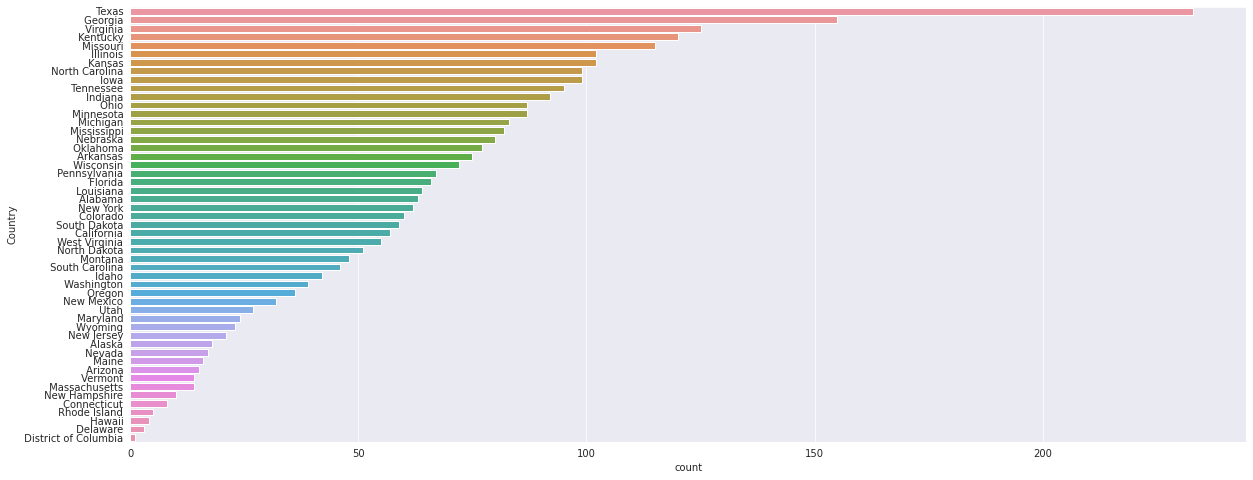

In [ ]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.countplot(data=data_1,y='Country',order=order)

From here we infer maximum data has been taken from the **Texas** county.

In [ ]:
Age

Index(['medianage', 'medianagemale', 'medianagefemale'], dtype='object')

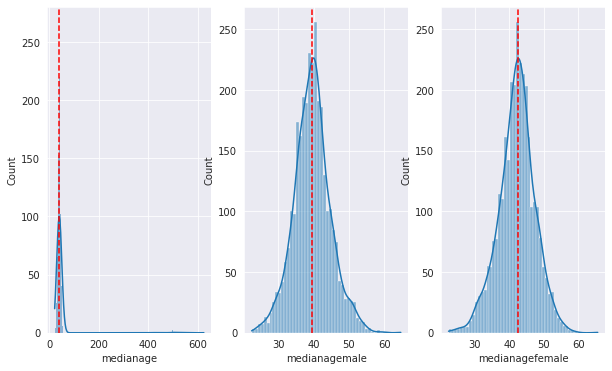

In [ ]:
plt.figure(figsize=(10,6))
for i in range(3):
  plt.subplot(1,3,i+1)
  sns.histplot(data=data_1,x=data_1[Age[i]],kde=True,)
  plt.axvline(data_1[Age[i]].median(),color='r',linestyle='dashed')

From here we infer that ,

*   **medianage of males have a cancer is 40**
*   **medianage of females have a cancer is 43**




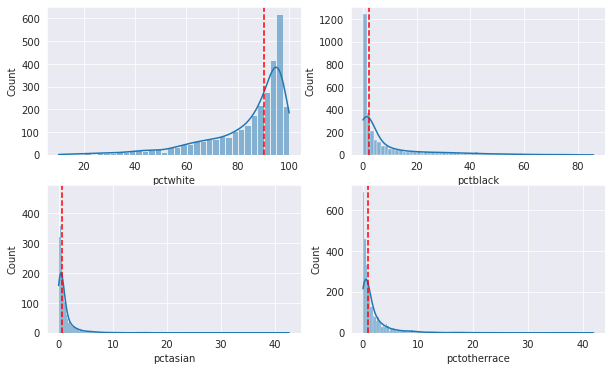

In [ ]:
plt.figure(figsize=(10,6))
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.histplot(data=data_1,x=data_1[Ethinicity[i]],kde=True,)
  plt.axvline(data_1[Ethinicity[i]].median(),color='r',linestyle='dashed')

From ethinicity features, white peoples are a more cancer patients compare to black,asian and Others. The dataset has taken from the **U.S.** there are more white peoples compare to other groups.

In [ ]:
data_2 = data_1.groupby(by='Country')
cntyavgcnt=data_2['avganncount','avgdeathsperyear'].mean()

<ipython-input-15-9d412024b245>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cntyavgcnt=data_2['avganncount','avgdeathsperyear'].mean()


In [ ]:
ind=cntyavgcnt.index

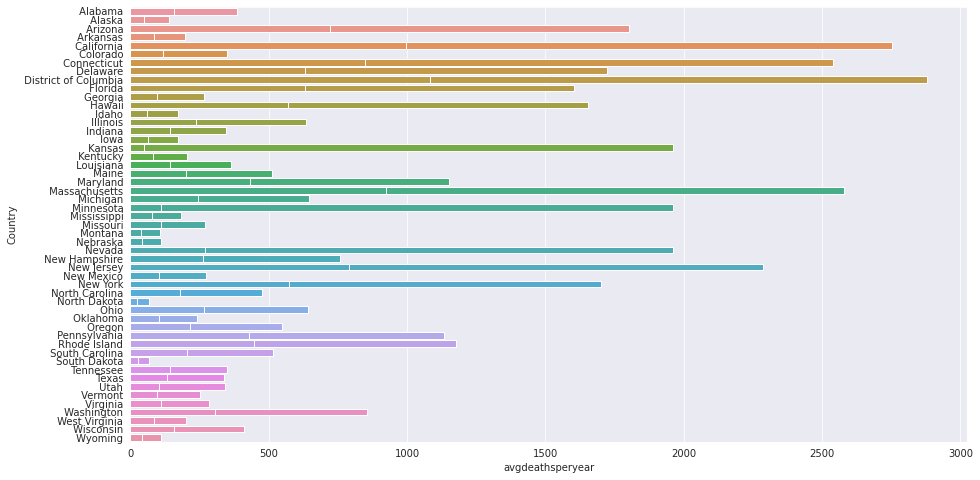

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(y=ind,x=cntyavgcnt['avganncount'])
sns.barplot(y=ind,x=cntyavgcnt['avgdeathsperyear'])

From this plot, each county wise data has grouped and find the mean avganncount and avgdeathsperyear also ploted as stacked bar. Here District of Columbia has highest average annual count and average death per year are registered.

In [ ]:
medianinc=data_2['medincome','incidencerate','avgdeathsperyear'].mean()

<ipython-input-18-e4d8217eaa06>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medianinc=data_2['medincome','incidencerate','avgdeathsperyear'].mean()


In [ ]:
medianinc=medianinc.sort_values(by='medincome',ascending=False)
ind1=medianinc.index

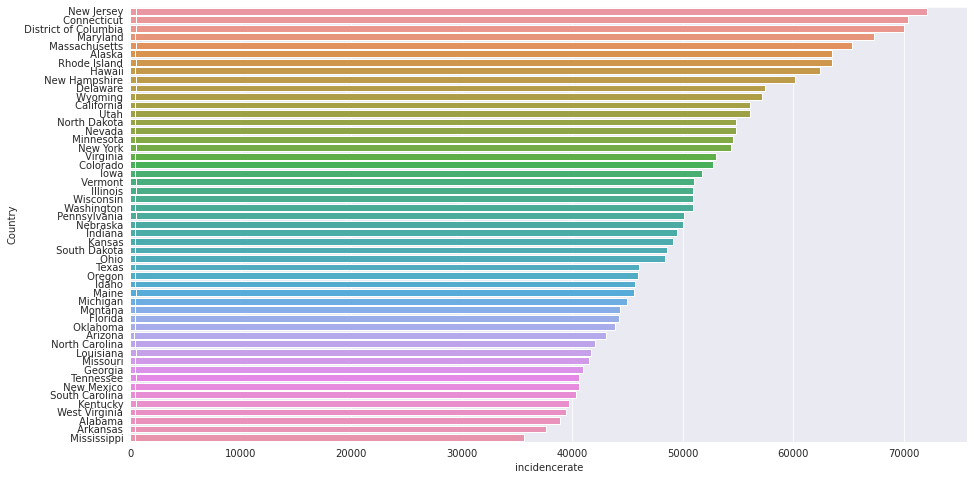

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=medianinc['medincome'],y=ind1)
sns.barplot(x=medianinc['incidencerate'],y=ind1)

From the plot we infer that incident rate between county are similar there is no high difference between them.**New Jersey** county has highest median income.

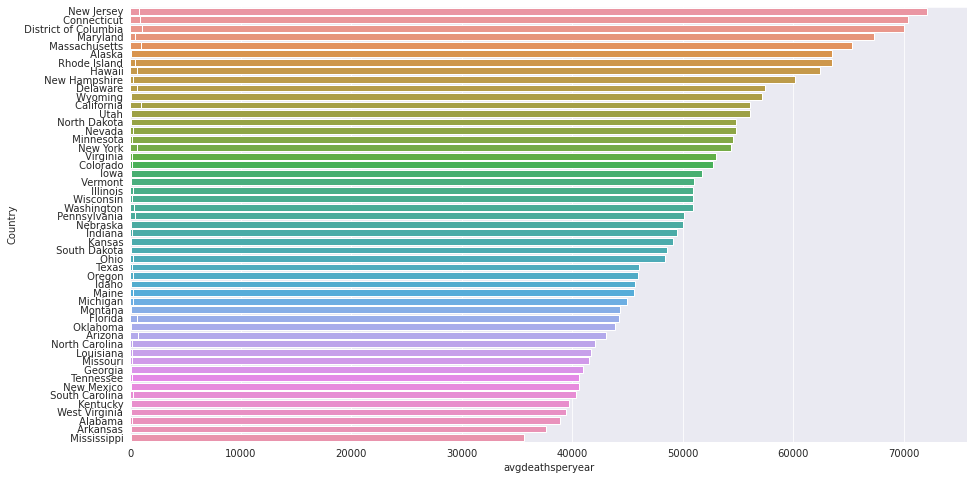

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=medianinc['medincome'],y=ind1)
sns.barplot(x=medianinc['avgdeathsperyear'],y=ind1)

From this plot,Inspite of high median income in **New Jersey** there is high rate of deathrate.

In [ ]:
popul = data_2[['popest2015','avganncount']].mean()
popul =popul.sort_values(by='popest2015',ascending=False)
ind2 = popul.index

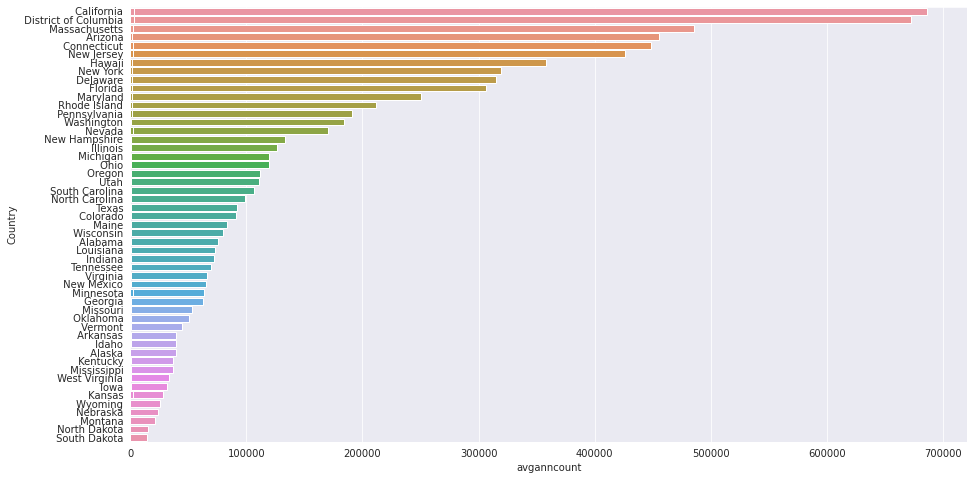

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=popul['popest2015'],y=ind2)
sns.barplot(x=popul['avganncount'],y=ind2)

There is high population in California county and there is a average annual count is high in it.

**Domain Knowledge**  



*   In 2021  more than 10 million people died of cancer worldwide.
*   That's 1 out of every 6 deaths.
*   Over 600,000 cancer deaths happen in the U.S. each year.




In [ ]:
data_3=data.copy()
data_3

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


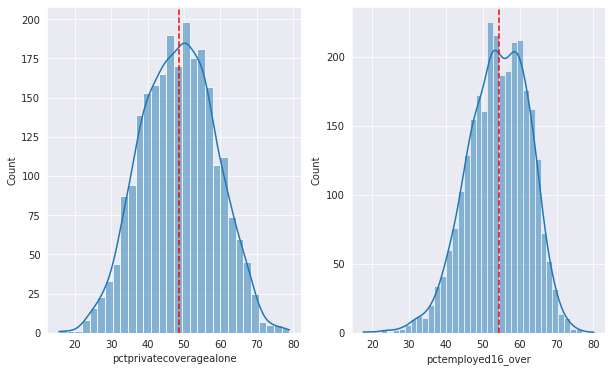

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(x=data_3['pctprivatecoveragealone'],kde=True)
plt.axvline(data_3['pctprivatecoveragealone'].median(),color='red',linestyle='dashed')
plt.subplot(1,2,2)
sns.histplot(x=data_3['pctemployed16_over'],kde=True)
plt.axvline(data_3['pctemployed16_over'].median(),color='red',linestyle='dashed')

From the histogram and central tendency values we infer that features are skewed and fill the values of median.

In [ ]:
median1 = data_3['pctprivatecoveragealone'].median()
median2 = data_3['pctemployed16_over'].median()

In [ ]:
data_3['pctprivatecoveragealone'].fillna(median1,inplace=True)
data_3['pctemployed16_over'].fillna(median2,inplace=True)

In [ ]:
data_3.isnull().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
percentmarried             0
l_scl                      0
dip                        0
pctbachdeg18_24            0
diptf                      0
bacdegtf                   0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
dtype: int64

In [ ]:
stu = data_2['studypercap'].mean()
death = data_2['avgdeathsperyear'].mean()

In [ ]:
px.scatter(stu,death)

In [ ]:
data_2

There is high number of Per capita number of cancer-related clinical trials in california but there is more no.of peoples diagnosis cancer is positive.

## Correlation Analysis

In [ ]:
corr=data_3.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



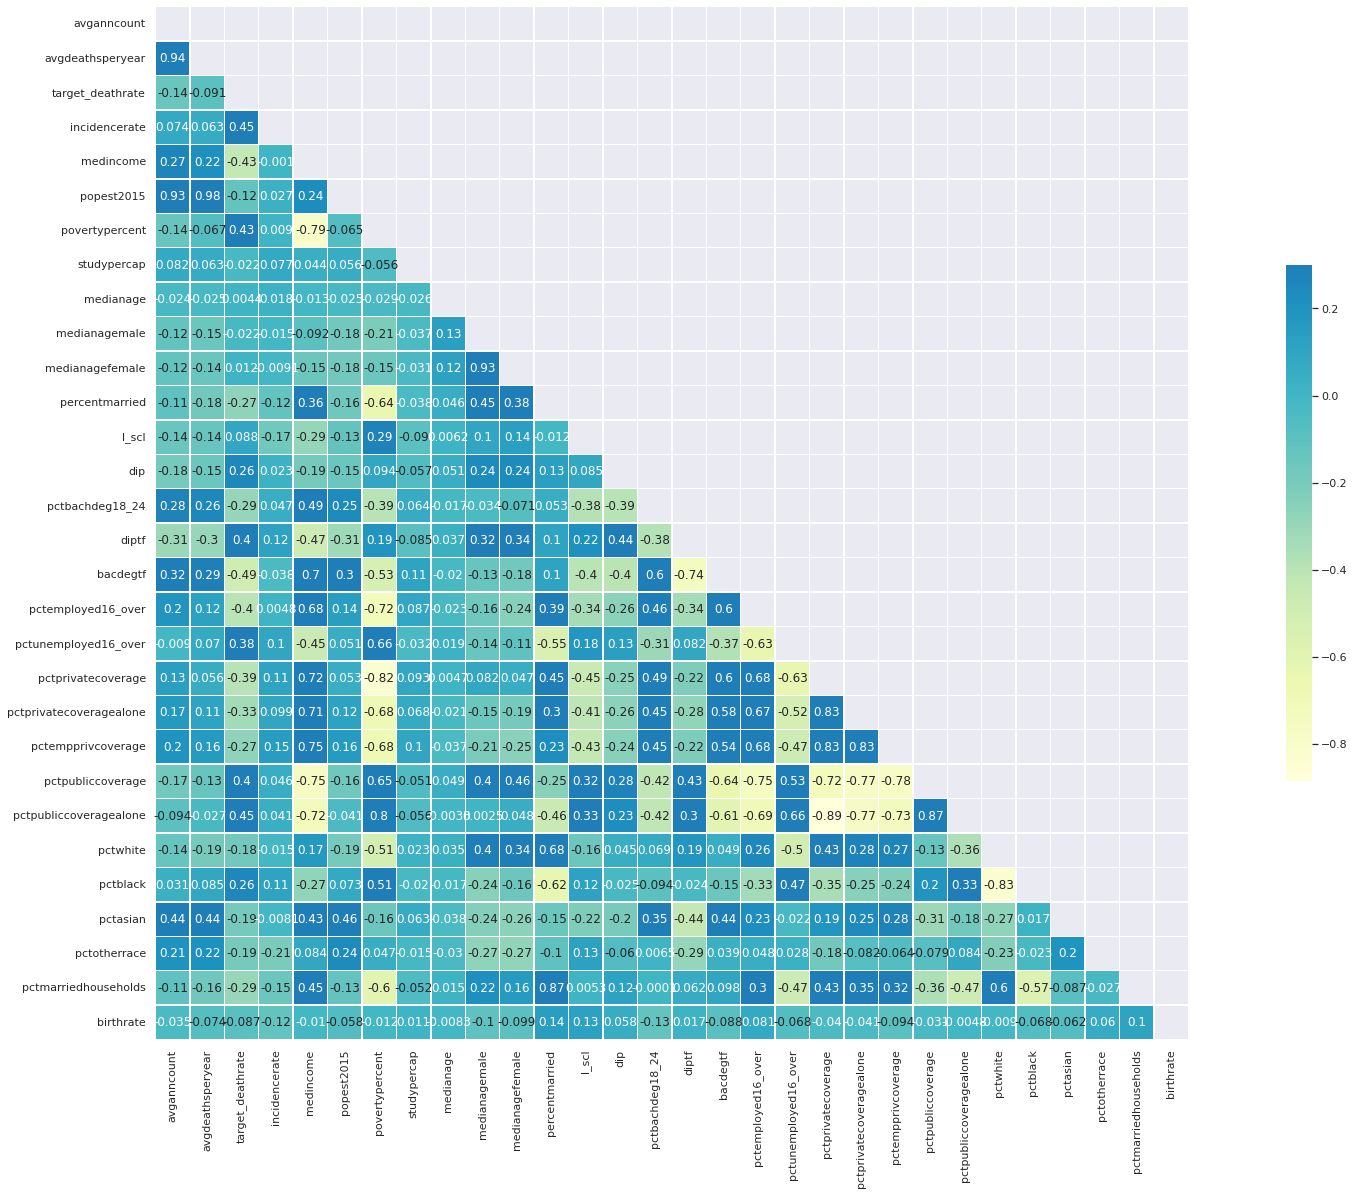

In [ ]:
sns.set_theme(style="darkgrid")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 19))
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Assumption for Linear Regression

In [ ]:
final_df = data_3[['avganncount','avgdeathsperyear','target_deathrate','incidencerate','studypercap']]

In [ ]:
final_df.corr()['target_deathrate']

avganncount        -0.143532
avgdeathsperyear   -0.090715
target_deathrate    1.000000
incidencerate       0.449432
studypercap        -0.022285
Name: target_deathrate, dtype: float64

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = final_df.drop('target_deathrate',axis=1)
Y = final_df['target_deathrate']

In [ ]:
data_3.to_csv('cancer.csv')

In [ ]:
#Defining the model
X=sm.add_constant(X)
model = sm.OLS(Y,X)

#Fitting the model
result = model.fit()

# printing the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       target_deathrate   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     258.5
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.98e-191
Time:                        15:47:12   Log-Likelihood:                -14003.
No. Observations:                3047   AIC:                         2.802e+04
Df Residuals:                    3042   BIC:                         2.805e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               74.7569      3.601  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Assumption-1 : Linear Relationship

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

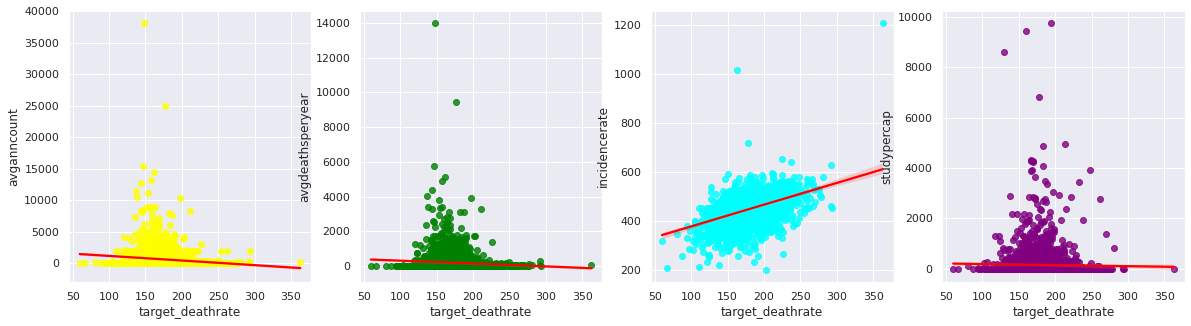

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)

plt.subplot(1,4,1)
sns.regplot(Y,X['avganncount'],scatter_kws={"color":"yellow"},line_kws={"color":"red"})

plt.subplot(1,4,2)
sns.regplot(Y,X['avgdeathsperyear'],scatter_kws={"color":"green"},line_kws={"color":"red"})

plt.subplot(1,4,3)
sns.regplot(Y,X['incidencerate'],scatter_kws={"color":"cyan"},line_kws={"color":"red"})

plt.subplot(1,4,4)
sns.regplot(Y,X['studypercap'],scatter_kws={"color":"purple"},line_kws={"color":"red"})


Linearity check condition has been satisfied since the avganncount, avgdeathsperyear, incidencerate and studypercap are linearly correlated with house_price which means change in value of any independent feature will impact the response variable (ie. Target Death Rate)

#Assumption 2 : No or Less Multicolinearity

In [ ]:
def calculate_vif(dataset):
  vif=pd.DataFrame()
  vif['features'] = dataset.columns
  vif['vif_values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif

In [ ]:
features = final_df.drop('target_deathrate',axis=1)
calculate_vif(features)

,features,vif_values
0,avganncount,10.126740
1,avgdeathsperyear,9.685575
2,incidencerate,1.269117
3,studypercap,1.099047


Most of research papers consider a VIF(Variance Inflation Factor)>10 as an indicator of multicollinearity. In our case 'avganncount' has 10.126 so I wish to remove it for train features. 

Assumption -3 Homoskedasiticity

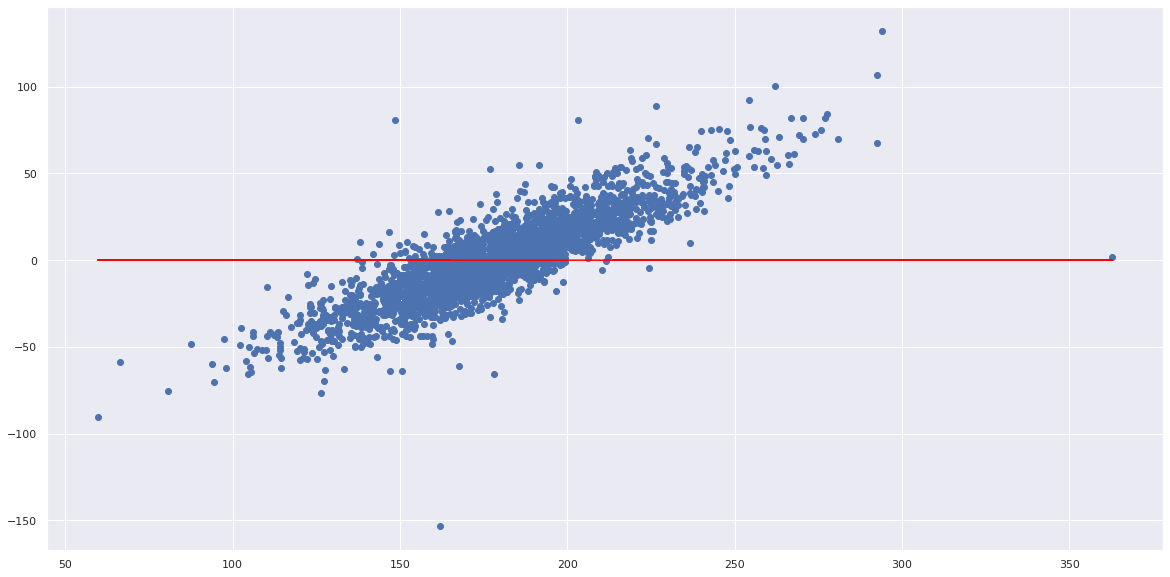

In [ ]:
residuals = result.resid
plt.rcParams['figure.figsize']=(20,10)
plt.scatter(Y,residuals)
plt.plot(Y,[0]*len(Y),color='red')

The residuals are not in any specific pattern and are in range from -100 to +100. Hence the data is homoskedastic or follows a constant variance

Assumption-4 : No Autocorrelation of errors

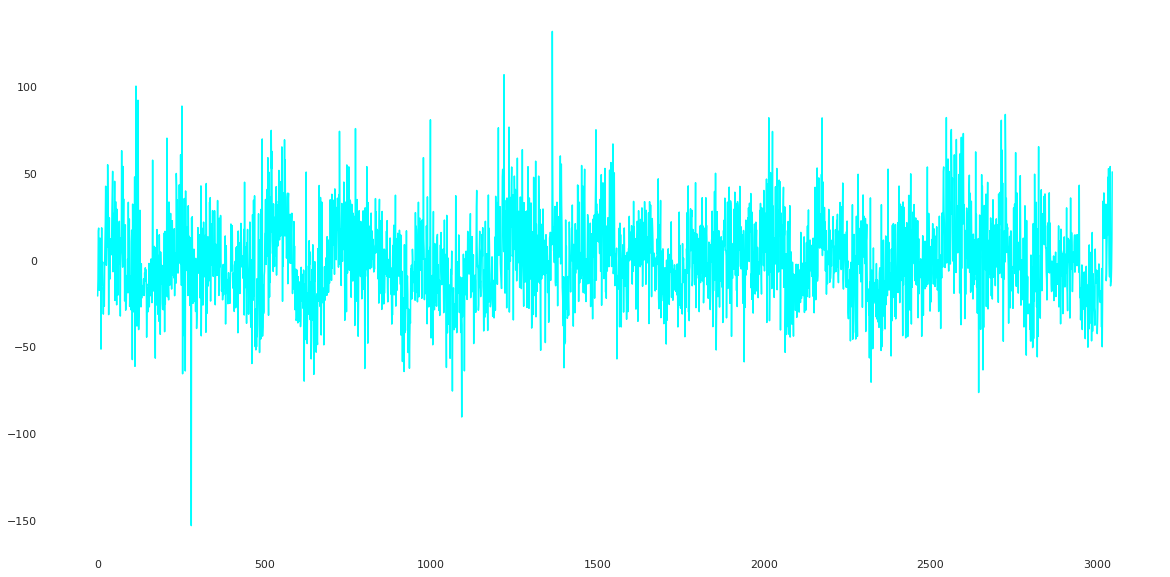

In [ ]:
plt.rcParams['axes.facecolor'] = 'white'
plt.plot(residuals.index, residuals.values, color='cyan')

We can infer that there is no Auto correlation among the errors

Assumption-5 :Residul Normality

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



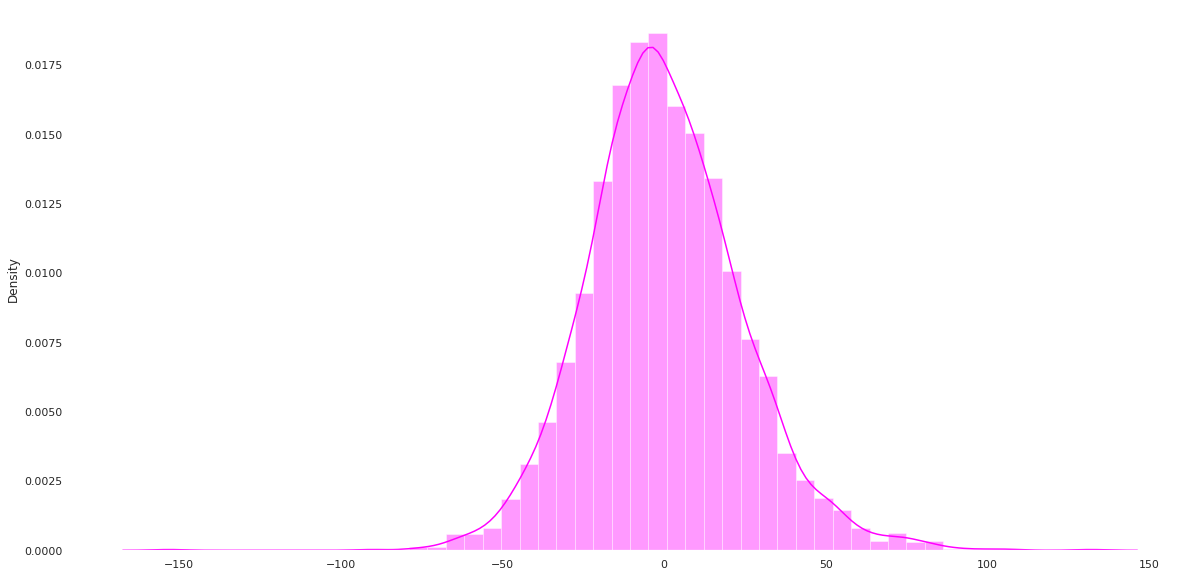

In [ ]:
sns.distplot(residuals,color='magenta')

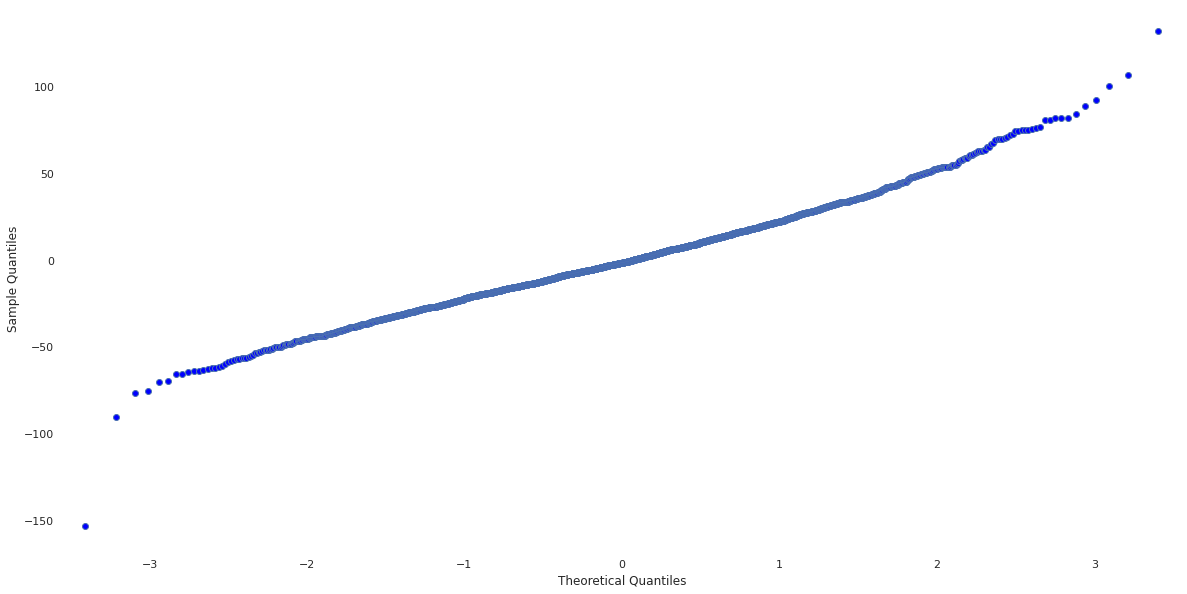

In [ ]:
sm.qqplot(residuals)
plt.show()

From the qqplot and histplot we can infer that the errors are normally distributed

Assumption 6 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

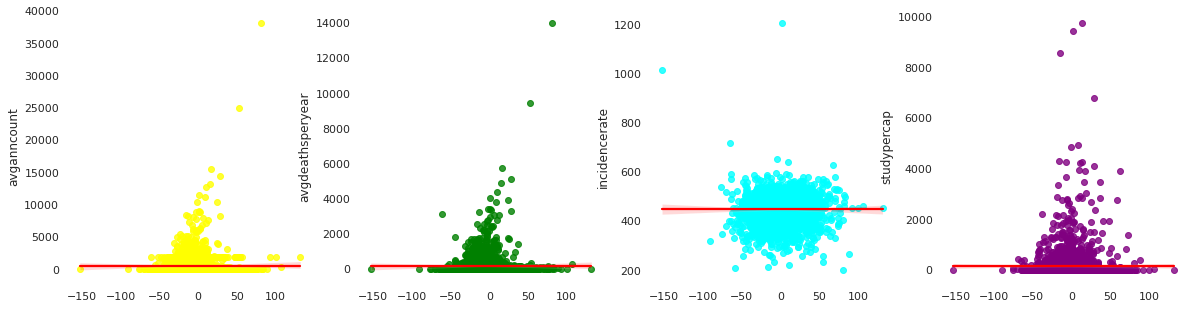

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)

plt.subplot(1,4,1)
sns.regplot(residuals,X['avganncount'],scatter_kws={"color":"yellow"},line_kws={"color":"red"})

plt.subplot(1,4,2)
sns.regplot(residuals,X['avgdeathsperyear'],scatter_kws={"color":"green"},line_kws={"color":"red"})

plt.subplot(1,4,3)
sns.regplot(residuals,X['incidencerate'],scatter_kws={"color":"cyan"},line_kws={"color":"red"})

plt.subplot(1,4,4)
sns.regplot(residuals,X['studypercap'],scatter_kws={"color":"purple"},line_kws={"color":"red"})


Residuals are not related to any of the independent variables, and also the residual does not form a pattern with independent varibles

#Model

Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as met

In [ ]:
X1 = X['incidencerate']
Y1 =Y

In [ ]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1,random_state=40,train_size=0.8)

In [ ]:
mod = LinearRegression()
mod.fit(x1_train.values.reshape(-1,1),y1_train)

LinearRegression()

In [ ]:
y1_pred = mod.predict(x1_test.values.reshape(-1,1))

In [ ]:
mod.score(x1_train.values.reshape(-1,1),y1_train)

0.20102835526232754

In [ ]:
mod.score(x1_test.values.reshape(-1,1),y1_test)

0.20450781721716949

In [ ]:
rmse1 = np.sqrt(met.mean_squared_error(y1_test,y1_pred))
R_sqare1 = met.r2_score(y1_test,y1_pred)

In [ ]:
print(rmse1,R_sqare1)

25.611304960555795 0.20450781721716949


Multi Linear Regression

In [ ]:
XX = X.drop(columns=['const','avganncount'],axis=1)
YY =Y

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(XX,YY,random_state=40,train_size=0.8)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train,y_train)

0.21844773027325015

In [ ]:
model.score(x_test,y_test)

0.2184971806886573

In [ ]:
rmse = np.sqrt(met.mean_squared_error(y_test,y_pred))
R_sqare = met.r2_score(y_test,y_pred)

In [ ]:
rmse,R_sqare

(25.38510849253999, 0.2184971806886573)

K-fold Validation

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),XX,YY,cv=cv)

array([0.23421444, 0.20218526, 0.23986314, 0.21436027, 0.25846227])

Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [ ]:
T_X = XX
T_Y = Y1

In [ ]:
model1=Sequential()
model1.add(Dense(512,input_shape=[3],activation='relu'))
model1.add(Dense(1,activation='linear'))

In [ ]:
model1.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mse'])

In [ ]:
model1.fit(T_X,T_Y,epochs=100)

Epoch 1/100
96/96 [==============================] - 1s 4ms/step - loss: 4810.9878 - mse: 4810.9878
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 704.3810 - mse: 704.3810
Epoch 3/100
96/96 [==============================] - 0s 3ms/step - loss: 727.6559 - mse: 727.6559
Epoch 4/100
96/96 [==============================] - 0s 5ms/step - loss: 784.0102 - mse: 784.0102
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 694.2673 - mse: 694.2673
Epoch 6/100
96/96 [==============================] - 1s 5ms/step - loss: 850.2474 - mse: 850.2474
Epoch 7/100
96/96 [==============================] - 0s 3ms/step - loss: 685.1914 - mse: 685.1914
Epoch 8/100
96/96 [==============================] - 0s 3ms/step - loss: 661.6862 - mse: 661.6862
Epoch 9/100
96/96 [==============================] - 1s 5ms/step - loss: 656.3026 - mse: 656.3026
Epoch 10/100
96/96 [==============================] - 1s 6ms/step - loss: 669.0741 - mse: 669.0741
Epoch 11/100
96/9

**Insights**

* The more number of data has taken from the Texas county
*  **medianage of males have a cancer is 40**
*  **medianage of females have a cancer is 43**
*  In **california** more number of peoples have affected by cancer.